In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cortex
import cortex.polyutils
import os
import popeye

Import subject surface items

In [2]:
subject='02'
left, right = cortex.db.get_surf(subject, 'fiducial')

dump_path='/Volumes/BAHAMUT/OUTPUT/FULL'


left_surface = cortex.polyutils.Surface(left[0], left[1])
right_surface = cortex.polyutils.Surface(right[0], right[1])

In [3]:
import dill
def load(filename):
	input_file = open(filename, 'rb')
	obj = dill.load(input_file)
	return obj

Get the long format data

In [4]:
DATA=load(os.path.join(dump_path,'DICTS','02_prf.pkl'))

In [5]:
LDATA=DATA['longframe']
LDATA

,pred,data,X,Y,S,r2,idx,hem
0,-0.061673,-0.101361,-4.030473,2.704765,10.000000,0.276955,0,1
1,-0.061673,-0.040971,-4.030473,2.704765,10.000000,0.276955,0,1
2,-0.061673,0.021593,-4.030473,2.704765,10.000000,0.276955,0,1
3,-0.061673,0.133278,-4.030473,2.704765,10.000000,0.276955,0,1
4,-0.061673,0.018237,-4.030473,2.704765,10.000000,0.276955,0,1
...,...,...,...,...,...,...,...,...
114,-0.042881,0.011638,49.991326,49.999130,1.599544,0.091939,163841,2
115,-0.043394,-0.085277,49.991326,49.999130,1.599544,0.091939,163841,2
116,-0.040960,0.047204,49.991326,49.999130,1.599544,0.091939,163841,2
117,-0.037502,-0.075058,49.991326,49.999130,1.599544,0.091939,163841,2


Start with one hemisphere

In [6]:
hemdataL=LDATA[LDATA['hem']==1]

In [7]:
hemdataL

,pred,data,X,Y,S,r2,idx,hem
0,-0.061673,-0.101361,-4.030473,2.704765,10.000000,0.276955,0,1
1,-0.061673,-0.040971,-4.030473,2.704765,10.000000,0.276955,0,1
2,-0.061673,0.021593,-4.030473,2.704765,10.000000,0.276955,0,1
3,-0.061673,0.133278,-4.030473,2.704765,10.000000,0.276955,0,1
4,-0.061673,0.018237,-4.030473,2.704765,10.000000,0.276955,0,1
...,...,...,...,...,...,...,...,...
114,-0.011871,-0.014585,-7.670884,-24.754417,4.077267,0.040942,163841,1
115,-0.011867,0.178405,-7.670884,-24.754417,4.077267,0.040942,163841,1
116,-0.011866,0.100495,-7.670884,-24.754417,4.077267,0.040942,163841,1
117,-0.011866,-0.378007,-7.670884,-24.754417,4.077267,0.040942,163841,1


Also get the short format data.

In [8]:
sframe=DATA['shortframe']
sframeL=sframe[0:163842]

In [9]:
sframeL

,R2,sigma,isigma,ecc,iecc,ang,iang,X,Y,ROI,idx
0,27.695471,10.000000,0.0,4.853912,0.0,303.864723,0.0,-4.030473,2.704765,0.0,0.0
1,56.418604,2.472724,0.0,0.632930,0.0,163.553058,0.0,0.179200,-0.607032,0.0,1.0
2,4.057080,0.564935,0.0,30.484376,0.0,271.545341,0.0,-30.473289,0.822103,0.0,2.0
3,1.943642,1.174882,0.0,50.340255,0.0,173.334591,0.0,5.843050,-50.000000,0.0,3.0
4,44.977633,10.000000,0.0,28.175164,0.0,326.041273,0.0,-15.738522,23.369613,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
163837,6.610769,3.568604,0.0,27.273022,0.0,270.552347,0.0,-27.271754,0.262915,0.0,163837.0
163838,5.086345,3.371377,0.0,50.033778,0.0,267.894552,0.0,-50.000000,-1.838177,0.0,163838.0
163839,7.046388,0.823435,0.0,36.692029,0.0,185.398425,0.0,-3.452021,-36.529284,0.0,163839.0
163840,3.977068,4.272498,0.0,29.205179,0.0,191.310836,0.0,-5.728059,-28.637943,0.0,163840.0


Get indices corresponding to V1 (these are neuropythy derived)

In [9]:
v1inds=np.array(sframeL['idx'][sframeL['ROI']==1]).astype(int)

In [10]:
v1inds
iL=np.array(sframeL['ROI'])

In [11]:
BIGDATAL=load('/Volumes/BAHAMUT/DUMP/BIGLHEM.pkl')

Define a function for deriving a patch of surface in an ROI and returning the gaussian weighted signal

In [12]:

def zoom_to_roi(subject, roi, hem, margin=5.0):
    roi_verts = cortex.get_roi_verts(subject, roi)[roi]
    roi_map = cortex.Vertex.empty(subject)
    roi_map.data[roi_verts] = 1

    (lflatpts, lpolys), (rflatpts, rpolys) = cortex.db.get_surf(subject, "flat",
                                                                nudge=True)
    sel_pts = dict(left=lflatpts, right=rflatpts)[hem]
    roi_pts = sel_pts[np.nonzero(getattr(roi_map, hem))[0],:2]

    xmin, ymin = roi_pts.min(0) - margin
    xmax, ymax = roi_pts.max(0) + margin
    plt.axis([xmin, xmax, ymin, ymax])


from numpy import exp, linspace, random
from matplotlib import gridspec


def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)



def my_patch(comb,hemsurf,hemdata,ROI,plot):
    
    
    try:
        vertex=comb[0]
        radius=comb[1]



        # Define a patch centred on a given vertex with a given radius.
        patch = hemsurf.get_geodesic_patch(vertex, radius=radius)

        # Get a vertex mask for this patch
        criterion1=patch['vertex_mask']

        # Also make sure that the patch doesnt extend beyod the ROI.
        criterion2=iL==ROI
        mymask=np.logical_and(criterion1 == True, criterion2 == True)

        subsurface = left_surface.create_subsurface(vertex_mask=mymask)
        subsurface_vertices=np.where(mymask==True)


        # Get the data from these vertices.    
        dsubset=hemdata[:,subsurface_vertices[0]]

        # Weight the distances according to the gaussian function.
        dists = subsurface.geodesic_distance([np.where(subsurface_vertices[0]==vertex)])
        dsubset=dsubset[:,0:int(dists.shape[0])]
        invdist = [float(i)/max(dists) for i in dists]
        
        
        weights = gaussian(np.array(invdist), 1, 0, 0.2)

        # Perform weighted a eraging of this signal.
        avdat=np.squeeze(np.average(dsubset,axis=1,weights=weights))
        dataset = cortex.Vertex(subsurface.lift_subsurface_data(weights), subject, cmap='viridis')
        if plot:

            fig = plt.figure(figsize=(17, 6)) 
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
            ax0 = plt.subplot(gs[0])


            cortex.quickshow(dataset,fig=ax0)
            plt.title('example V1 subsurface')
            zoom_to_roi('02','V1','left')

            ax1 = plt.subplot(gs[1])

            ax1.plot(dsubset,alpha=0.1)



            ax1.plot(avdat,linewidth=3)
            plt.title('Weighted signal in sub-surface')


    except:
        weights=0
        avdat=0
        dataset=0
        
        pass


    return patch, subsurface, subsurface_vertices, weights, dataset, avdat

For example,take a path centred around the first v1 vertex.

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


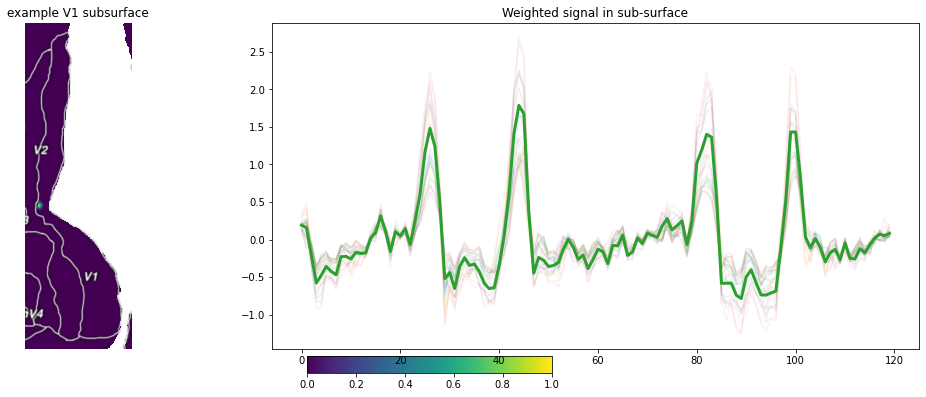

In [14]:
comb=[int(v1inds[1]),3]


x=my_patch(comb,left_surface,BIGDATAL,1,1)

In theory, if we make this larger, it should be stunted and not extend beyond the V1/V2 boundary.

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


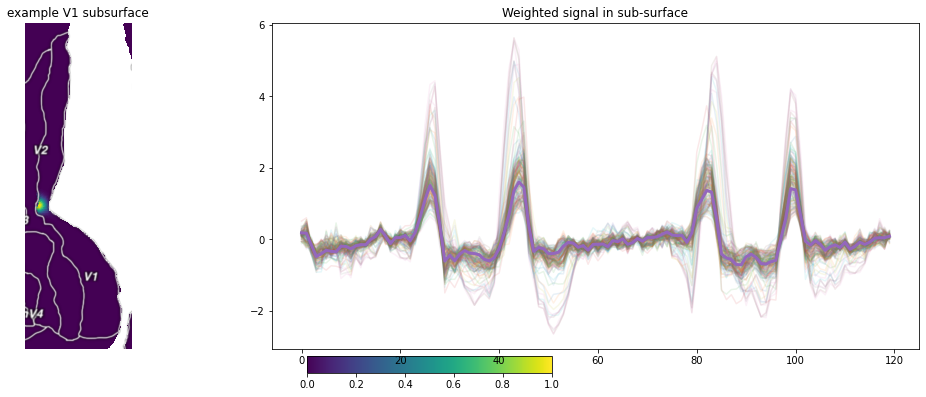

In [15]:
comb=[int(v1inds[1]),8]

x=my_patch(comb,left_surface,BIGDATAL,1,1)

Yup.

Now, I would like to iterate over all V1 vertices, and a given set of sizes.

In [16]:
v1inds=v1inds.astype(int)
sizes=np.linspace(1,25,50)

In [17]:
import itertools
comblist=list(itertools.product(v1inds, sizes))

In [13]:
from joblib import Parallel, delayed


In [ ]:
attempt=Parallel(n_jobs=5,verbose=9,backend='loky')(delayed(my_patch)(comb,left_surface,BIGDATAL,1,0)  for comb in comblist)

There is a problem with doing this efficiently, which is that the SuperLU object cannot be pickled - therefore I can't seem to run this in paralell. 

Therefore, my next solution is to just abandon the 'patch' class, and instead.

1. just precompute all of the distance matrices for each vertex in V1.
2. Create masks that select vertices that are a given distance from the vertex.

Here is one I made earlier, that contains distances from all V1 vertices.

In [294]:
dists = load(os.path.join(dump_path,'DISTMAT','02_prf.pkl'))

Dists is a set of distance matrices from all points on V1. For instance, here is the first distance matrix.

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


<Figure size 1728x1152 with 0 Axes>

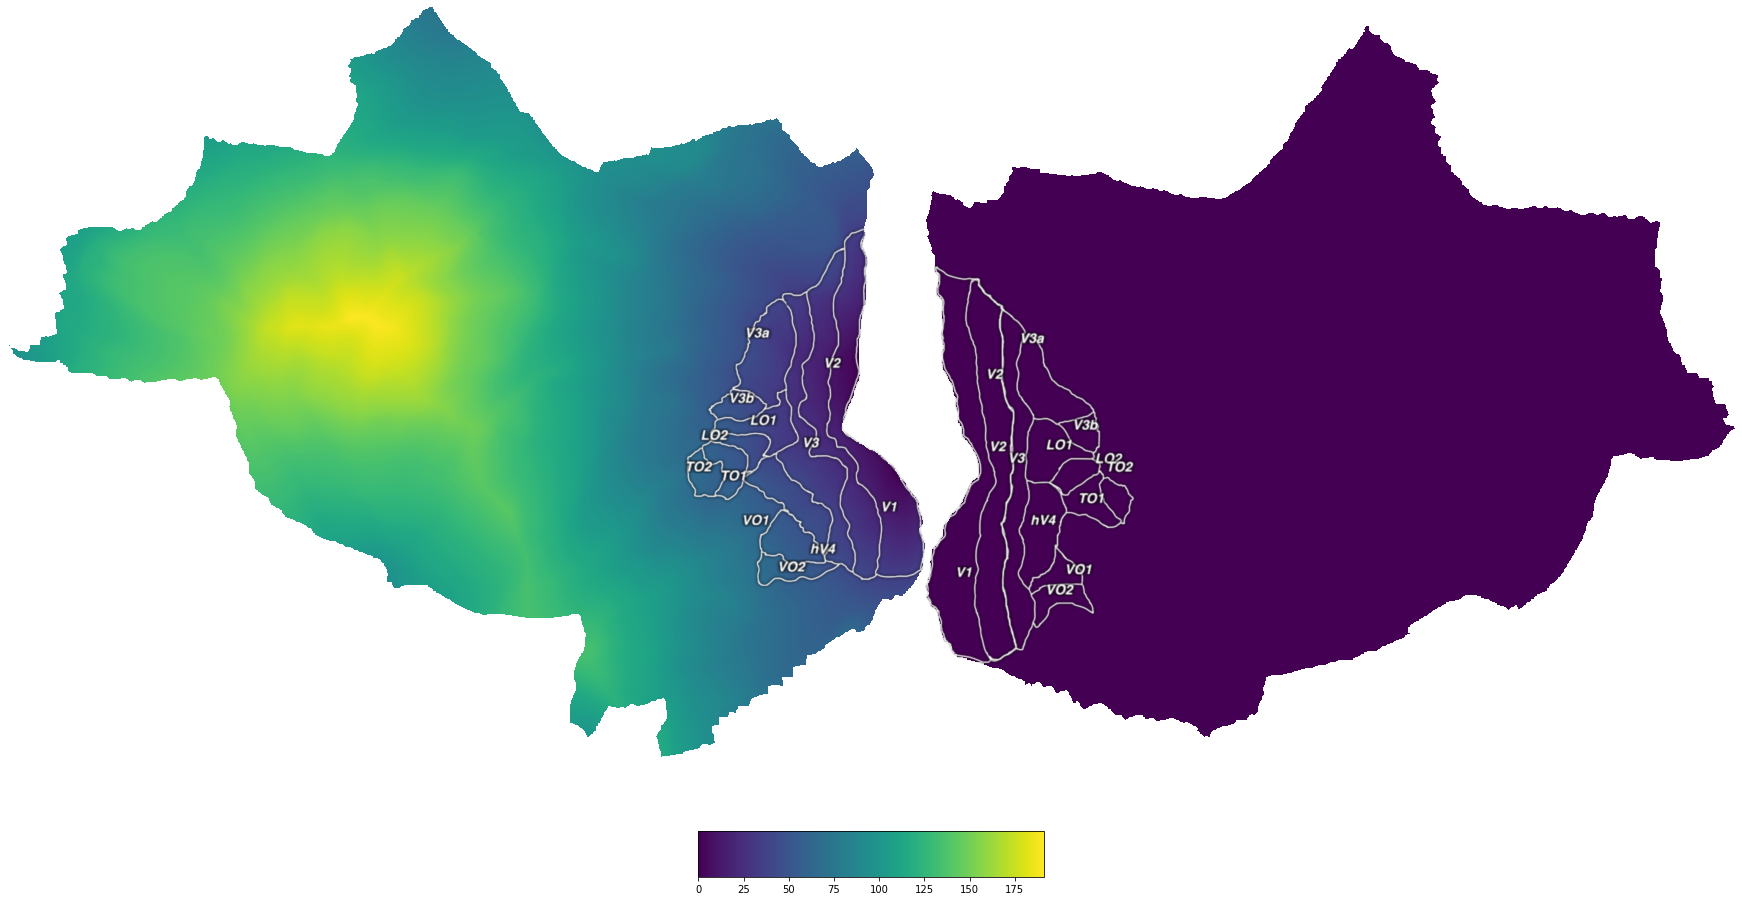

In [223]:
import matplotlib.pyplot as plt

flatmap_height = 2048
full_figsize = (24, 16)

full_fig = plt.figure(constrained_layout=True, figsize=full_figsize)


dataset = cortex.Vertex(dists[0],subject,cmap='viridis')
full_fig = plt.figure(constrained_layout=True, figsize=full_figsize)

mfig=cortex.quickshow(dataset,with_curvature=True,fig=full_fig)

Now I make some functions that come in useful. I use standard linear regression stuff. I also create a function for gaussian weighting distances.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy
from scipy import stats



# Standard lm
def fitter(EV,DV):
    regressor = LinearRegression()
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(EV, DV)
    r2=r_value**2
    fits=EV*slope
    return r2, fits

# Gaussian weighting according to inverted distances
def gaussian_weighter(mydists):
    
    if len(mydists)!=1:
        invdist = mydists/np.max(mydists)
        
        #invdist = [float(i)/max(mydists) for i in mydists]
        weights = gaussian(np.array(invdist), 1, 0, 0.2)
    else:
    # If it is only one vertex then we don't need to bother with weighting.
        weights=np.array([1])
    return weights

Now I create a larger function for

i) Defining a patch
ii) plotting it
iii) getting the weighted signal within the patch.
iv) Regressing it against a signal from a vertex in V2

In [307]:
def my_patch_n(params,ROI,v2vert,plot):
    
    # Idx = index of vertex that the patch is to be centred on.
    # ROI = ROI that the resulting patch needs to be contained within.
    # size= Size of the patch (mm)
    # v2vert = The timeseries that needs explaining (e.g. from a vertex in V2).
    
    try:
        idx=params[0]
        size=params[1]
        
        DV=BIGDATAL[:,v2vert] # Get the data we want to explain.
        vert = v1inds[idx] # Get the V1 vertex we are centreing the distances on
        mydist = dists[idx] #  Get the corresponding distance matrix
        criterion1=dists[idx]<size #  Create the relevant size mask
        criterion2=iL==ROI #  Create the relevant ROI mask
        mymask=np.logical_and(criterion2 == True,criterion1==True) # Combined mask
        
        dsubset=BIGDATAL[:,mymask] # Get the TS data from within that mask
        mydists=mydist[mymask] # Get the distances inside that mask
        weights=gaussian_weighter(mydists) # Weight them
        
        # Create a pycortex dataset to show the weighted patch
        test=np.zeros(163842,dtype=np.float64) 
        test[mymask]=weights
        
        # Also show the relevant V2 vertex.
        test[v2vert]=1
        
        # Average the TS data from within the mask, weighted by the distances in the mask.
        #avdat=np.squeeze(np.average(dsubset,axis=1,weights=weights))
        
        
        avdat=np.squeeze(np.dot(dsubset,weights)/sum(weights))
        
        # This then serves as a EV for the fitter function, with the V2 data as the DV.
        r2,fits=fitter(avdat,DV)
        dataset=0
        if plot:
            dataset = cortex.Vertex(test,subject,cmap='viridis',vmin=0,vmax=1)
            
            # Figure 1 shows the V2 vertex and the patch.
            fig = plt.figure(figsize=(17, 8)) 
            gs = gridspec.GridSpec(3,3)
            ax0 = plt.subplot(gs[:,0])
            cortex.quickshow(dataset,fig=ax0)
            plt.title('example V1 subsurface')
            zoom_to_roi('02','V1','left')
            
            # Figure 2 shows all the signals within the patch
            ax1 = plt.subplot(gs[0,1:3])
            ax1.plot(dsubset,alpha=0.1)
            plt.title('Signals in subsurface ' + str(len(weights)))
            
            # Figure 3 shows the weighted signal from the patch
            ax2 = plt.subplot(gs[1,1:3])
            ax2.plot(avdat,linewidth=3)
            plt.title('Weighted signal in subsurface')
            
            # Figure 4 shows how it fits to the V2 data. 
            ax3 = plt.subplot(gs[2,1:3])
            ax3.plot(DV,linewidth=3)
            ax3.plot(fits,linewidth=3)

            plt.title('Fit to V2 vertex ' +str(r2))


    except:
        weights=0
        avdat=0
        dsubset=0
        mymask=0
        r2=0
        fits=0
        dataset=0

    return mymask, weights, dsubset, avdat,r2,fits, dataset

As a test, apply this function to a vertex in V2.

In [15]:
v2inds=np.array(sframeL['idx'][sframeL['ROI']==2]).astype(int)

In [16]:
v2vert=v2inds[2]

Now, ordinarily, we would use a gradient descent type thing to sample over the parameter space. 

However, as far as I can determine - in the original CF paper they did a simple grid search:

"To do this, we generated various different fMRI time-series predictions by varying the connective field parameters v0, and σ, across all existing voxel positions on the V1 surface (both hemispheres) and 50 sigma values ranging from 0 to 25 mm."

Therefore, I am just going to set up a big list of parameters to iterate through.

So now I define a function for testing a range of sizes and vertices.

In [17]:
import itertools
from joblib import Parallel, delayed


flatmap_height = 2048
full_figsize = (10, 10)

full_fig = plt.figure(constrained_layout=True, figsize=full_figsize)

def cf_fits(sizemin,sizemax,sizevals,ROIinds,processors,DVvert):
    
    # Make a big param matrix
    sizes=np.linspace(sizemin,sizemax,sizevals)
    centres=range(ROIinds.shape[0])
    paramlist=list(itertools.product(centres, sizes))
    
    # Test all in a big paralell loop.
    print('Testing ' + str(len(paramlist)) +' Combinations')
    attempt=Parallel(n_jobs=processors,verbose=9,backend='multiprocessing')(delayed(my_patch_n)(param,1,DVvert,0)  for param in paramlist)
    R2=list()

    # Bundle the R2s
    for attempts in attempt:
        R2.append(attempts[4])
    
    R2array=np.array(R2)
    
    paramarray=np.array(paramlist)
    
    # Get the best params.
    bestparams=paramlist[np.argmax(R2array)]
    
    # Now, at the best size, plot the R2 on the V1.
    testR2=np.zeros(163842,dtype=np.float64)
    testR2[testR2==0]=np.nan
    testR2[v1inds]=R2array[paramarray[:,1]==bestparams[1]]
    testR2[DVvert]=1

    light=cortex.Vertex2D(testR2,testR2,subject='02', vmin=0, vmax=1,vmin2=0,vmax2=1,cmap='plasma_alpha')
    heavy=cortex.Vertex(testR2,subject='02', vmin=0, vmax=1,cmap='plasma')
    
    full_fig = plt.figure(constrained_layout=True, figsize=full_figsize)
    mfig=cortex.quickshow(light,with_curvature=True,fig=full_fig)
    zoom_to_roi('02','V1','left')
    plt.title('Sampling extent is' + str(bestparams[1]))
    
    return paramlist, attempt, bestparams, R2array, light,heavy, mfig

<Figure size 720x720 with 0 Axes>

However, before scaling this up, I am just going to start by using a small number of sizes.

Since we are doing V1 - V2 it would be strange if the CF sizes were huge. Therefore, I'm going to do up to 3mm. 

Testing 17835 Combinations


[Parallel(n_jobs=5)]: Using backend MultiprocessingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 758 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 2422 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 4342 tasks      | elapsed:    4.1s
[Parallel(n_jobs=5)]: Done 6518 tasks      | elapsed:    6.1s
[Parallel(n_jobs=5)]: Done 8950 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done 11638 tasks      | elapsed:   11.9s
[Parallel(n_jobs=5)]: Done 14582 tasks      | elapsed:   15.0s
[Parallel(n_jobs=5)]: Done 17602 tasks      | elapsed:   18.3s
[Parallel(n_jobs=5)]: Done 17826 out of 17835 | elapsed:   18.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 17835 out of 17835 | elapsed:   18.5s finished


Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


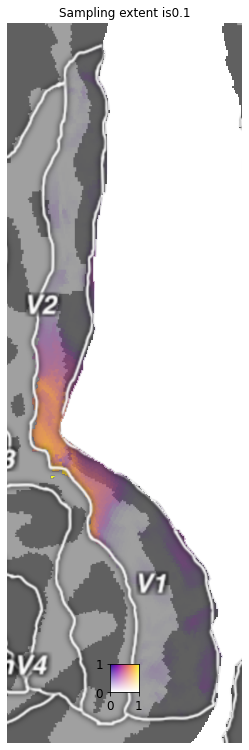

In [229]:
myfits=cf_fits(0.1,3,5,v1inds,5,v2vert)

Now plot the best patch

In [17]:
myfits[0][np.argmax(myfits[3])]

NameError: name 'myfits' is not defined

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


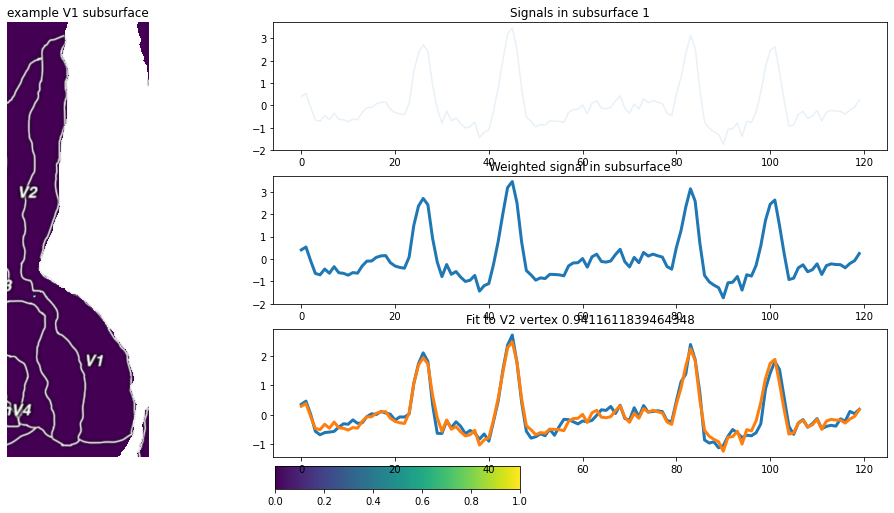

In [298]:
b=my_patch_n(myfits[0][np.argmax(myfits[3])],1,v2vert,1)

The patch in question seems to be right on the V1 boundary, which makes it hard to see.

Now let's try this for somehwere, higher up, like hv4, which should have larger receptive fields

In [231]:
V4inds=np.array(sframeL['idx'][sframeL['ROI']==4]).astype(int)
V4vert=V4inds[2]

Here, I allow for larger cf sizes. I keep the search very coarse.

Testing 10701 Combinations


[Parallel(n_jobs=5)]: Using backend MultiprocessingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 534 tasks      | elapsed:    4.4s
[Parallel(n_jobs=5)]: Done 774 tasks      | elapsed:    6.3s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    8.5s
[Parallel(n_jobs=5)]: Done 1350 tasks      | elapsed:   11.0s
[Parallel(n_jobs=5)]: Done 1686 tasks      | elapsed:   14.3s
[Parallel(n_jobs=5)]: Done 2054 tasks      | elapsed:   17.8s
[Parallel(n_jobs=5)]: Done 2454 tasks      | elapsed:   21.7s
[Parallel(n_jobs=5)]: Done 2886 tasks      | elapsed:   25.7s
[Parallel(n_jobs=5)]: Done 3350 tasks      | elapsed:   30.1s
[Parallel(n_jobs=5)]: Done 3846 tasks      | elapsed:   34.7s
[Parallel(n_jobs=5)]: Done 4374 tasks      | elapsed

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


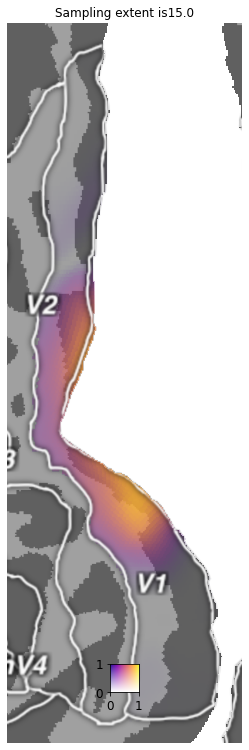

In [308]:
myfitsV4=cf_fits(10,15,3,v1inds,5,V4vert)

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


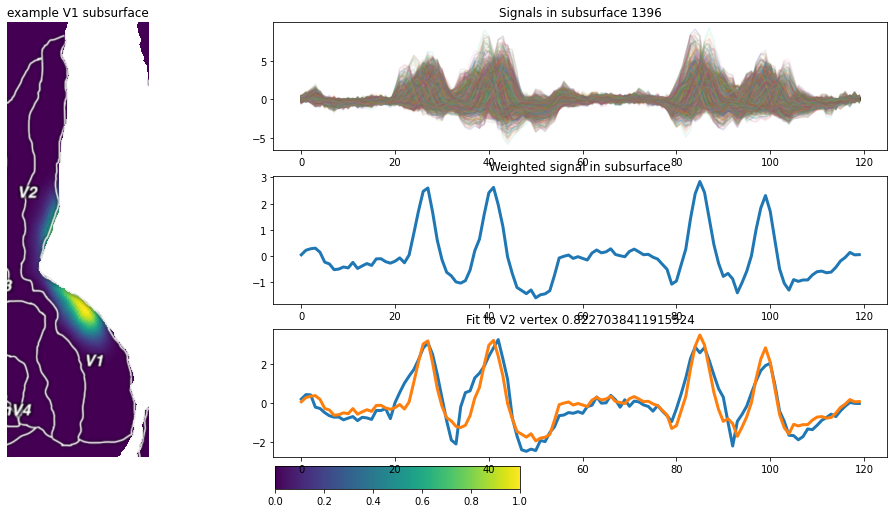

In [299]:
b=my_patch_n(myfitsV4[0][np.argmax(myfitsV4[3])],1,V4vert,1)

Now, i'd be curious to learn how the estimated receptive field of the v4 vertex relates to the receptive fields contained within the cf.

In [18]:
dm = np.load('/Volumes/BAHAMUT/STIM/design_matrix.npy')
from popeye.visual_stimulus import VisualStimulus
# put time dimension last for popeye
dm = np.moveaxis(dm,0,2)

# binarize
dm[dm<0.5] = 0
dm[dm>0.5] = 1

# remove fixation point
dm[49,88,:] = 0
dm[49,89,:] = 0
dm[50,88,:] = 0
dm[50,89,:] = 0

#revert y axis
dm = dm[::-1,:,:] # this is how popeye wants y dim (0 point is top of dm)


TR = 1.5

stimulus = VisualStimulus(stim_arr = dm,viewing_distance = 225, screen_width =  69.84,scale_factor = 1,
                          tr_length = TR,
                          dtype = np.short)

In [19]:
myindices=np.where(b[0]==True)[0]

NameError: name 'b' is not defined

In [245]:
def plotmyrfs(frame,stimulus,indices):
    
    if type(indices)==list: 
        frame=frame[frame["idx"].isin(indices)]
    
    
        prf = generate_og_receptive_field(frame.iloc[0]['X'],frame.iloc[0]['Y'],frame.iloc[0]['sigma'],stimulus.deg_x,stimulus.deg_y)
        field = np.zeros_like(prf)
    
        for i in range(frame.shape[0]):
            rf = generate_og_receptive_field(frame.iloc[i]['X'],frame.iloc[i]['Y'],frame.iloc[i]['sigma'],stimulus.deg_x,stimulus.deg_y)
            field += rf
    else:
        frame=frame[frame["idx"]==indices]
        field=generate_og_receptive_field(frame.iloc[0]['X'],frame.iloc[0]['Y'],frame.iloc[0]['sigma'],stimulus.deg_x,stimulus.deg_y)
        
        
    return field
    

In [246]:
myfieldv4=plotmyrfs(sframeL,stimulus,V4vert)
myfieldv1=plotmyrfs(sframeL,stimulus,list(myindices))

Text(0.5, 1.0, 'V1 fields in connective field')

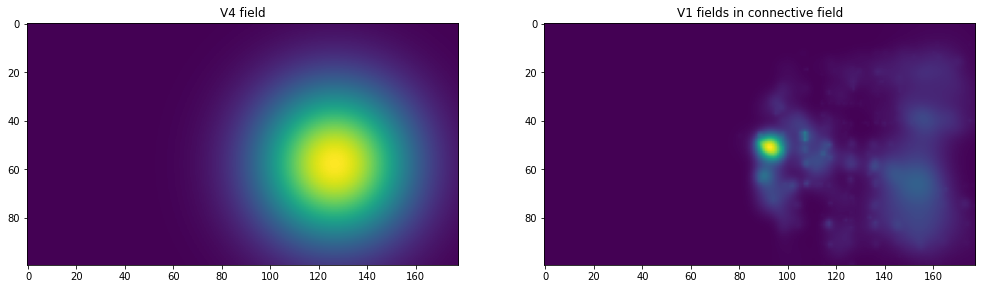

In [247]:
fig = plt.figure(figsize=(17, 8)) 
gs = gridspec.GridSpec(1,2)
ax0 = plt.subplot(gs[0])
plt.imshow(myfieldv4)
plt.title('V4 field')

ax1 = plt.subplot(gs[1])
plt.imshow(myfieldv1)
plt.title('V1 fields in connective field')

In [20]:
def gauss1D_cart(x, mu=0.0, sigma=1.0):
    """gauss1D_cart
    gauss1D_cart takes a 1D array x, a mean and standard deviation,
    and produces a gaussian with given parameters, with a peak of height 1.
    Parameters
    ----------
    x : numpy.ndarray (1D)
        space on which to calculate the gauss
    mu : float, optional
        mean/mode of gaussian (the default is 0.0)
    sigma : float, optional
        standard deviation of gaussian (the default is 1.0)
    Returns
    -------
    numpy.ndarray
        gaussian values at x
    """

    return np.exp(-((x-mu)**2)/(2*sigma**2))

In [21]:
c1=sframeL['ROI']==1
c2=sframeL['R2']>15
c3=sframeL['ecc']<8

mymask=np.logical_and(c1 == True, c2 == True)

mymask2=np.logical_and(c3 == True, mymask == True)


In [22]:
filtmask=np.array(sframeL['idx'][mymask2]).astype(int)
filtmask.shape

(1556,)

In [23]:
filtmask

array([    34,     86,    348, ..., 162698, 162699, 162700])

In [24]:
subject = "02"

# First we need to import the surfaces for this subject
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

In [24]:
surfs[0]

In [89]:
fulldist=np.array(sframeL['idx']).astype(int)
fulldists=list()
for vert in fulldist:
    fulldists.append(surfs[0].geodesic_distance(vert))

array([     0.,      1.,      2., ..., 163839., 163840., 163841.])

In [25]:
fdists=list()

for vert in filtmask:
    print(vert)
    fdists.append(surfs[0].geodesic_distance(vert))

34
86
348
442
443
570
576
625
828
976
977
1397
1398
1778
1990
1991
1992
2355
2364
2365
2366
2510
2518
2519
2746
2747
2748
2896
2897
2898
3318
3919
3921
3922
3923
4366
4367
4368
4369
4370
5263
5264
5265
5266
5268
5269
5270
5629
5630
5631
5632
5633
5641
5649
5650
5651
5653
6097
6098
6364
6365
6366
6367
6887
6903
7121
7123
7135
8554
8555
8556
8557
8558
8559
8560
8561
9603
9621
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
10083
10096
10108
10109
10110
10111
10112
10113
10114
10426
10427
10428
10576
10577
10578
10996
10997
11599
11600
11601
11602
11603
12046
12047
12048
12918
12919
12942
12943
12944
12945
12946
13306
13310
13312
13329
13330
13331
13999
14000
14001
14002
14003
14446
14447
14448
14449
14450
14451
14452
15320
15709
15710
15712
15713
17524
17526
17528
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
21475
21477
21479
21480
21483
21484
21486
21548
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
215

148796
148797
148798
148799
148800
148801
148802
148803
148804
148805
148806
148807
148808
148809
148810
148811
148812
148813
148814
148815
148816
148817
148845
148846
148847
148849
148850
148851
158036
158037
158062
158075
158089
158166
158168
158169
158237
158238
158240
158245
158246
158247
158248
158249
158250
158251
158252
158253
158475
158486
158487
158488
158490
158491
158492
158493
158494
158495
158496
158497
158498
158499
158500
158501
158502
158503
158504
158505
158506
158507
158508
158509
158510
158511
158512
158513
158514
158515
158516
158517
158518
158519
158520
158521
158522
158523
158524
158525
158526
158527
158528
158529
158530
158531
158532
158533
158534
158535
158536
158537
158538
158539
158540
158541
158542
158543
158544
158545
158546
158547
158548
158549
158550
158551
158552
158553
158554
158555
158556
158557
158558
158559
158560
158561
158562
158563
158564
158565
158566
158567
158568
158569
158570
158571
158572
158573
158574
158575
158576
158577
158651
158652
158655

In [26]:
v1mask=np.array(c1)

In [27]:
fdistarr=np.array(fdists)

In [32]:
garray=gauss1D_cart(fdistarr,0,3)

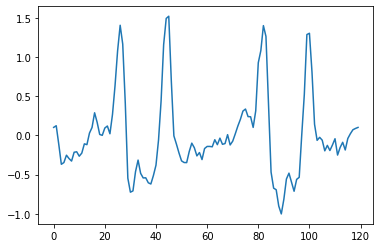

In [35]:
dat1=np.dot(BIGDATAL,garray[1])/sum(garray[1])
plt.plot(dat1)

In [38]:
sizes=np.linspace(0.1,25,25)
from joblib import Parallel, delayed
mlist=list()

for s in sizes:
    print(s)
    mlist.append(gauss1D_cart(fdistarr,0,s))

In [42]:
sizes=np.linspace(0.1,25,25)
sizes

Background RRGGBBAA: ffffff00
Area 0:0:2358.35:1024 exported to 2358 x 1024 pixels (96 dpi)


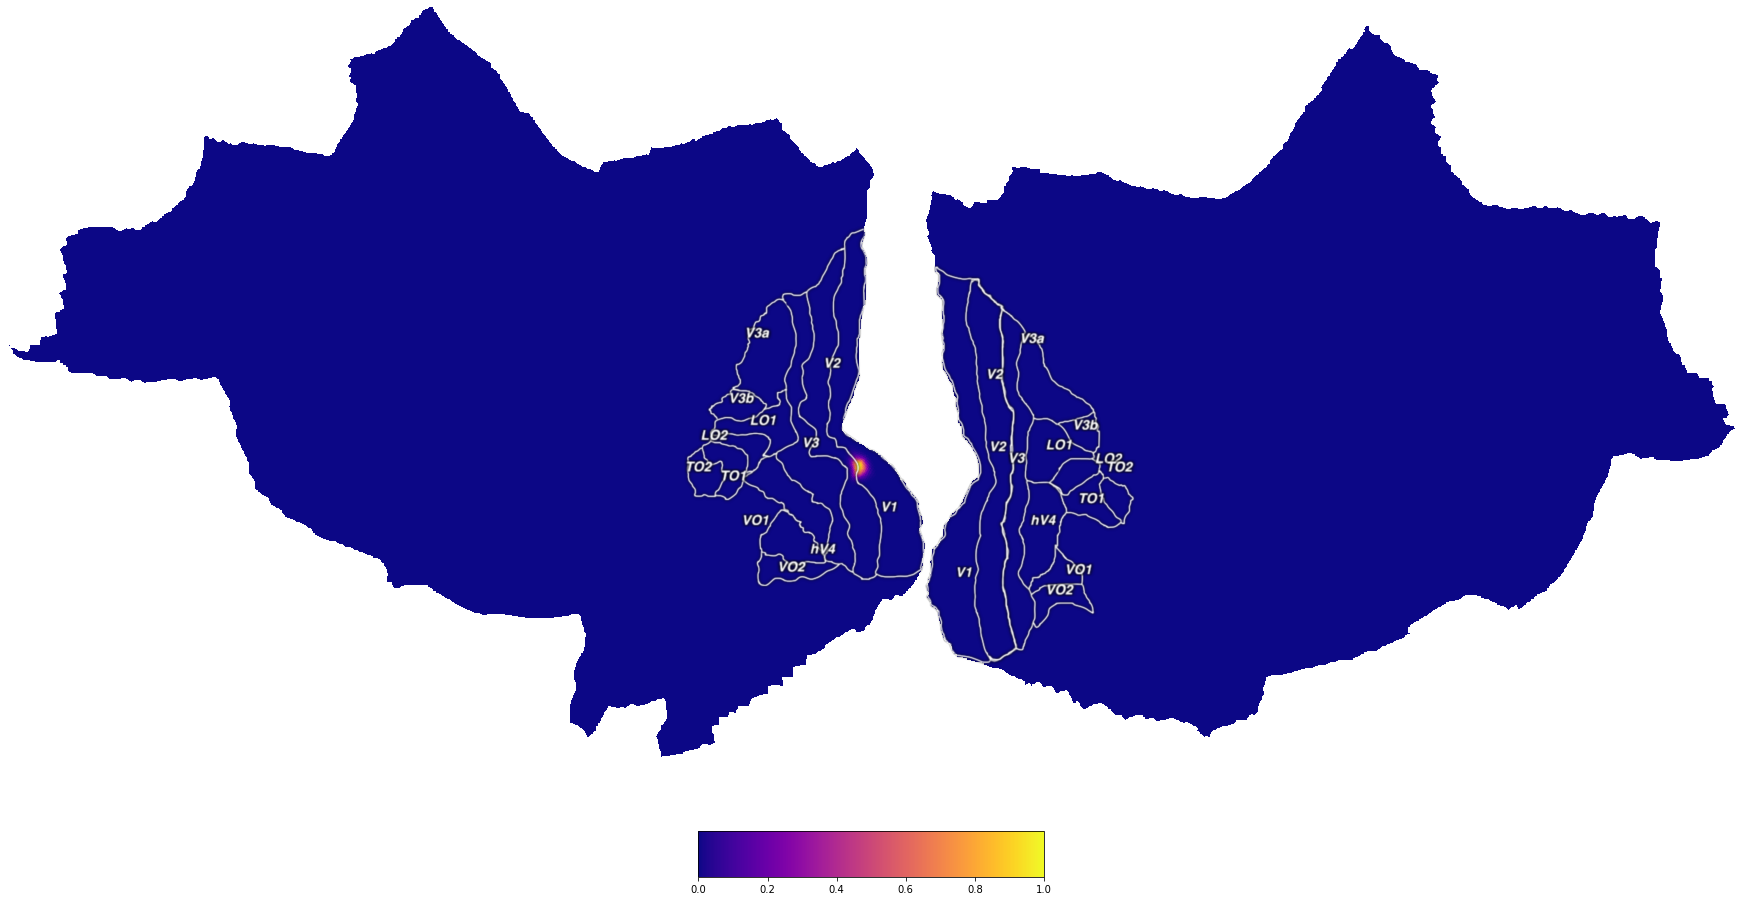

In [39]:
heavy=cortex.Vertex(marray[4,:],subject='02', vmin=0, vmax=1,cmap='plasma')
full_figsize = (24, 16)

full_fig = plt.figure(constrained_layout=True, figsize=full_figsize)
mfig=cortex.quickshow(heavy,with_curvature=True,fig=full_fig)

(1556, 163842)

In [437]:
def cf_minimal(params,vertmask):
    idx=params[0]
    size=params[1]
    field=gauss1D_cart(fdists[idx],0,size)
    field[vertmask==False]=0
    pooled_dat=np.dot(BIGDATAL,field)/sum(field)    
    return field, pooled_dat

In [430]:
SIGNALS=
WEIGHTS=

In [443]:
def cf_space(sizemin,sizemax,sizevals,ROIinds):
    
    # Make a big param matrix
    sizes=np.linspace(sizemin,sizemax,sizevals)
    centres=range(ROIinds.shape[0])
    paramlist=list(itertools.product(centres, sizes))
    print('There are ' + str(len(paramlist)) +' Combinations')
    return paramlist

In [444]:
myspace=cf_space(0.1,25,50,filtmask)

There are 77800 Combinations


In [436]:
len(myspace)

77800

In [439]:
jub=cf_minimal(myspace[0],v1mask)

In [449]:
def get_fields(paramlist,processors):
    print('Testing ' + str(len(paramlist)) +' Combinations')
    attempt=Parallel(n_jobs=processors,verbose=9,backend='loky')(delayed(cf_minimal)(param,v1mask)  for param in paramlist)
    return attempt

In [455]:
myspace[1]

In [ ]:
idx=params[0]
size=params[1]
field=gauss1D_cart(fdists[idx],0,size)
field[vertmask==False]=0



pooled_dat=np.dot(BIGDATAL,field)/sum(field) 